In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

import matplotlib.pyplot as plt

from scipy.stats import randint
from numpy import argmax
from scipy import stats

In [2]:
from sklearn.metrics import cohen_kappa_score

In [3]:
import sklearn
sklearn.__version__

'1.1.1'

In [4]:
from collections import Counter
from sklearn.metrics import cohen_kappa_score

#Cmax significance with each other (with DILI compounds)

In [15]:
#ONLY THIS CELL NEEDS UPDATING 29 MArch

#Need to update here with new processed data before progressing ATTENTION!!!!
cmax_data = pd.read_csv("../Cmax_processed.csv")
cmax_data = cmax_data.rename(columns={"protonated_Standardized_SMILES": "protonated_smiles_r"})
cmax_data

,protonated_smiles_r,median pMolar total plasma concentration,median pMolar unbound plasma concentration
0,C#CC(O)(C=CCl)CC,4.257078,NaN
1,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN
2,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN
4,C1CCC(C(CC2CCCC[NH2+]2)C2CCCCC2)CC1,5.665112,6.127049
...,...,...,...
722,[NH3+]CCCC(O)([P](=O)(=O)O)[P](=O)(=O)O,5.973128,6.630705
723,[NH3+]CCCCC([NH2+]C(CCc1ccccc1)C(=O)[O-])C(=O)...,6.762893,6.762893
724,[NH3+]CCS,4.698970,NaN
725,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN


In [28]:
#train_data= pd.read_csv("../Train_data_liv_tox_18825.csv")
#test_data= pd.read_csv("../Test_data_DILIst_1275.csv")

train_data_features= pd.read_csv("../Train_data_liv_tox.csv")
train_data = train_data_features[~train_data_features.Source_rank.isin([2, 4, 9, 10, 12])].reset_index(drop=True)
train_data.to_csv("proxyDILIcompounds_withoverlapcompounds_DILI_13703.csv")
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,ABJKWBDEJIDSJZ,C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0,0,...,0.000000,10.085517,58.622510,318.221626,6.119647,1498.0,36.0,126.0,145.0,5.138889
1,COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACRHBAYQBXXRTO-UHFFFAOYSA-N,ACRHBAYQBXXRTO,COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...,0,0,...,5.293305,10.572726,78.667003,470.276975,6.531625,4157.0,58.0,178.0,212.0,7.750000
2,O=C(O)C(S)C(S)C(=O)O,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACTRVOBWPAIOHC-UHFFFAOYSA-N,ACTRVOBWPAIOHC,O=C([O-])C(S)C(S)C(=O)[O-],0,1,...,0.000000,8.702676,38.654211,179.956198,12.854014,121.0,12.0,42.0,45.0,2.333333
3,NC1CC1c1ccccc1,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AELCINSCMGFISI-UHFFFAOYSA-N,AELCINSCMGFISI,[NH3+]C1CC1c1ccccc1,0,0,...,7.664347,9.206634,59.600240,134.096426,6.095292,119.0,10.0,52.0,61.0,2.222222
4,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AEQGYUJKXATLBW-UHFFFAOYSA-N,AEQGYUJKXATLBW,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,0,0,...,7.247793,10.915325,85.019190,458.266839,6.454463,3111.0,67.0,190.0,235.0,6.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13698,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZLHVIYHWWQYJID-UHFFFAOYSA-N,ZLHVIYHWWQYJID,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,0,...,0.000000,9.860110,51.351894,240.078644,8.002621,598.0,28.0,96.0,113.0,3.916667
13699,CCCCSP(=O)(SCCCC)SCCCC,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZOKXUAHZSKEQSS-UHFFFAOYSA-N,ZOKXUAHZSKEQSS,CCCCSP(=O)(SCCCC)SCCCC,0,0,...,0.000000,8.981304,47.595574,314.096165,7.138549,616.0,18.0,68.0,70.0,4.375000
13700,O=C1CC(c2ccccc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZONYXWQDUYMKFB-UHFFFAOYSA-N,ZONYXWQDUYMKFB,O=C1CC(c2ccccc2)Oc2ccccc21,0,0,...,0.000000,9.786336,50.012654,224.083730,7.727025,500.0,26.0,90.0,106.0,3.750000
13701,O=C(O)CCC(=O)c1ccc(-c2ccccc2)cc1,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZPAKPRAICRBAOD-UHFFFAOYSA-N,ZPAKPRAICRBAOD,O=C([O-])CCC(=O)c1ccc(-c2ccccc2)cc1,0,0,...,0.000000,9.556834,51.655875,253.087018,7.908969,808.0,25.0,92.0,103.0,4.305556


In [7]:
#train_data= pd.read_csv("../Train_data_liv_tox_18825.csv")
#test_data= pd.read_csv("../Test_data_DILIst_1275.csv")


In [18]:
test_data= pd.read_csv("../Test_data_DILIst_1111.csv")
test_data["Source_rank"] = "DILI"
test_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,DILI,DILIst Classification Oral,DILI,AAKJLRGGTJKAMG-UHFFFAOYSA-N,AAKJLRGGTJKAMG,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,0,0,...,0.000000,10.116298,64.016835,393.168856,7.560940,2396.0,43.0,142.0,163.0,6.833333
1,COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...,1,DILI,DILIst Classification,DILI,UHRBTBZOWWGKMK-UHFFFAOYSA-N,UHRBTBZOWWGKMK,COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...,0,1,...,6.555357,10.733545,82.269503,496.064645,9.921293,3113.0,51.0,166.0,200.0,7.250000
2,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,1,DILI,DILIst Classification,DILI,UIEATEWHFDRYRU-UHFFFAOYSA-N,UIEATEWHFDRYRU,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1,0,1,...,6.293419,9.845276,74.440588,367.274390,5.923780,1895.0,34.0,132.0,148.0,6.138889
3,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...,1,DILI,DILIst Classification oral,DILI,UIOFUWFRIANQPC-UHFFFAOYSA-N,UIOFUWFRIANQPC,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...,0,0,...,7.853605,10.768843,83.380114,453.056148,9.639493,2402.0,53.0,170.0,211.0,6.291667
4,CC1OC1[P](=O)(=O)O,1,DILI,DILIst Classification Oral,DILI,UJNUDOLLRRCQDH-UHFFFAOYSA-N,UJNUDOLLRRCQDH,CC1OC1[P](=O)(=O)O,0,0,...,7.753194,9.180603,57.029675,137.000370,9.785741,61.0,7.0,42.0,48.0,1.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,DILI,DILIst Classification,DILI,KYRVNWMVYQXFEU-UHFFFAOYSA-N,KYRVNWMVYQXFEU,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,0,...,7.285507,9.858333,70.378545,301.052112,9.407879,994.0,29.0,110.0,129.0,4.666667
1107,CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...,0,DILI,DILIst Classification Intravenous,DILI,KXNPVXPOPUZYGB-UHFFFAOYSA-N,KXNPVXPOPUZYGB,CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...,0,1,...,0.000000,10.488075,71.463013,509.254066,7.072973,3704.0,57.0,180.0,209.0,7.625000
1108,CCC(c1cccc(O)c1)C(C)CN(C)C,0,DILI,DILIst Classification Oral,DILI,KWTWDQCKEHXFFR-UHFFFAOYSA-N,KWTWDQCKEHXFFR,CCC(c1cccc(O)c1)C(C)C[NH+](C)C,0,1,...,0.000000,9.353834,47.590867,222.185241,5.554631,448.0,21.0,74.0,82.0,3.722222
1109,CC(N)Cc1ccccc1,0,DILI,DILIst Classification Oral,DILI,KWTSXDURSIMDCE-UHFFFAOYSA-N,KWTSXDURSIMDCE,CC([NH3+])Cc1ccccc1,0,1,...,0.000000,8.564268,38.519688,136.112076,5.671336,126.0,9.0,44.0,46.0,2.333333


In [19]:
#For this excercise we have NOT removed compounds that are also present in the DILI dataset
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,ABJKWBDEJIDSJZ,C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0,0,...,0.000000,10.085517,58.622510,318.221626,6.119647,1498.0,36.0,126.0,145.0,5.138889
1,COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACRHBAYQBXXRTO-UHFFFAOYSA-N,ACRHBAYQBXXRTO,COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...,0,0,...,5.293305,10.572726,78.667003,470.276975,6.531625,4157.0,58.0,178.0,212.0,7.750000
2,O=C(O)C(S)C(S)C(=O)O,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACTRVOBWPAIOHC-UHFFFAOYSA-N,ACTRVOBWPAIOHC,O=C([O-])C(S)C(S)C(=O)[O-],0,1,...,0.000000,8.702676,38.654211,179.956198,12.854014,121.0,12.0,42.0,45.0,2.333333
3,NC1CC1c1ccccc1,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AELCINSCMGFISI-UHFFFAOYSA-N,AELCINSCMGFISI,[NH3+]C1CC1c1ccccc1,0,0,...,7.664347,9.206634,59.600240,134.096426,6.095292,119.0,10.0,52.0,61.0,2.222222
4,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AEQGYUJKXATLBW-UHFFFAOYSA-N,AEQGYUJKXATLBW,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,0,0,...,7.247793,10.915325,85.019190,458.266839,6.454463,3111.0,67.0,190.0,235.0,6.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13698,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZLHVIYHWWQYJID-UHFFFAOYSA-N,ZLHVIYHWWQYJID,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,0,...,0.000000,9.860110,51.351894,240.078644,8.002621,598.0,28.0,96.0,113.0,3.916667
13699,CCCCSP(=O)(SCCCC)SCCCC,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZOKXUAHZSKEQSS-UHFFFAOYSA-N,ZOKXUAHZSKEQSS,CCCCSP(=O)(SCCCC)SCCCC,0,0,...,0.000000,8.981304,47.595574,314.096165,7.138549,616.0,18.0,68.0,70.0,4.375000
13700,O=C1CC(c2ccccc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZONYXWQDUYMKFB-UHFFFAOYSA-N,ZONYXWQDUYMKFB,O=C1CC(c2ccccc2)Oc2ccccc21,0,0,...,0.000000,9.786336,50.012654,224.083730,7.727025,500.0,26.0,90.0,106.0,3.750000
13701,O=C(O)CCC(=O)c1ccc(-c2ccccc2)cc1,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZPAKPRAICRBAOD-UHFFFAOYSA-N,ZPAKPRAICRBAOD,O=C([O-])CCC(=O)c1ccc(-c2ccccc2)cc1,0,0,...,0.000000,9.556834,51.655875,253.087018,7.908969,808.0,25.0,92.0,103.0,4.305556


In [20]:
train_data = pd.concat([train_data, test_data]).reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,ABJKWBDEJIDSJZ,C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0,0,...,0.000000,10.085517,58.622510,318.221626,6.119647,1498.0,36.0,126.0,145.0,5.138889
1,COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACRHBAYQBXXRTO-UHFFFAOYSA-N,ACRHBAYQBXXRTO,COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...,0,0,...,5.293305,10.572726,78.667003,470.276975,6.531625,4157.0,58.0,178.0,212.0,7.750000
2,O=C(O)C(S)C(S)C(=O)O,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACTRVOBWPAIOHC-UHFFFAOYSA-N,ACTRVOBWPAIOHC,O=C([O-])C(S)C(S)C(=O)[O-],0,1,...,0.000000,8.702676,38.654211,179.956198,12.854014,121.0,12.0,42.0,45.0,2.333333
3,NC1CC1c1ccccc1,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AELCINSCMGFISI-UHFFFAOYSA-N,AELCINSCMGFISI,[NH3+]C1CC1c1ccccc1,0,0,...,7.664347,9.206634,59.600240,134.096426,6.095292,119.0,10.0,52.0,61.0,2.222222
4,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AEQGYUJKXATLBW-UHFFFAOYSA-N,AEQGYUJKXATLBW,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,0,0,...,7.247793,10.915325,85.019190,458.266839,6.454463,3111.0,67.0,190.0,235.0,6.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14809,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,DILI,DILIst Classification,DILI,KYRVNWMVYQXFEU-UHFFFAOYSA-N,KYRVNWMVYQXFEU,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,0,...,7.285507,9.858333,70.378545,301.052112,9.407879,994.0,29.0,110.0,129.0,4.666667
14810,CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...,0,DILI,DILIst Classification Intravenous,DILI,KXNPVXPOPUZYGB-UHFFFAOYSA-N,KXNPVXPOPUZYGB,CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...,0,1,...,0.000000,10.488075,71.463013,509.254066,7.072973,3704.0,57.0,180.0,209.0,7.625000
14811,CCC(c1cccc(O)c1)C(C)CN(C)C,0,DILI,DILIst Classification Oral,DILI,KWTWDQCKEHXFFR-UHFFFAOYSA-N,KWTWDQCKEHXFFR,CCC(c1cccc(O)c1)C(C)C[NH+](C)C,0,1,...,0.000000,9.353834,47.590867,222.185241,5.554631,448.0,21.0,74.0,82.0,3.722222
14812,CC(N)Cc1ccccc1,0,DILI,DILIst Classification Oral,DILI,KWTSXDURSIMDCE-UHFFFAOYSA-N,KWTSXDURSIMDCE,CC([NH3+])Cc1ccccc1,0,1,...,0.000000,8.564268,38.519688,136.112076,5.671336,126.0,9.0,44.0,46.0,2.333333


In [21]:
for i in train_data.Source_rank.unique():

 if (len(train_data[train_data["Source_rank"]==i]) != len(train_data[train_data["Source_rank"]==i].smiles_r.unique())):
    print(i)

In [22]:
all_sources_list = [ 3,  5,  6,  7,  8,  11, 14, 15, 16, "DILI"]
all_sources_list

[3, 5, 6, 7, 8, 11, 14, 15, 16, 'DILI']

3
314
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.968e-02 U_stat=6.364e+03
Hi


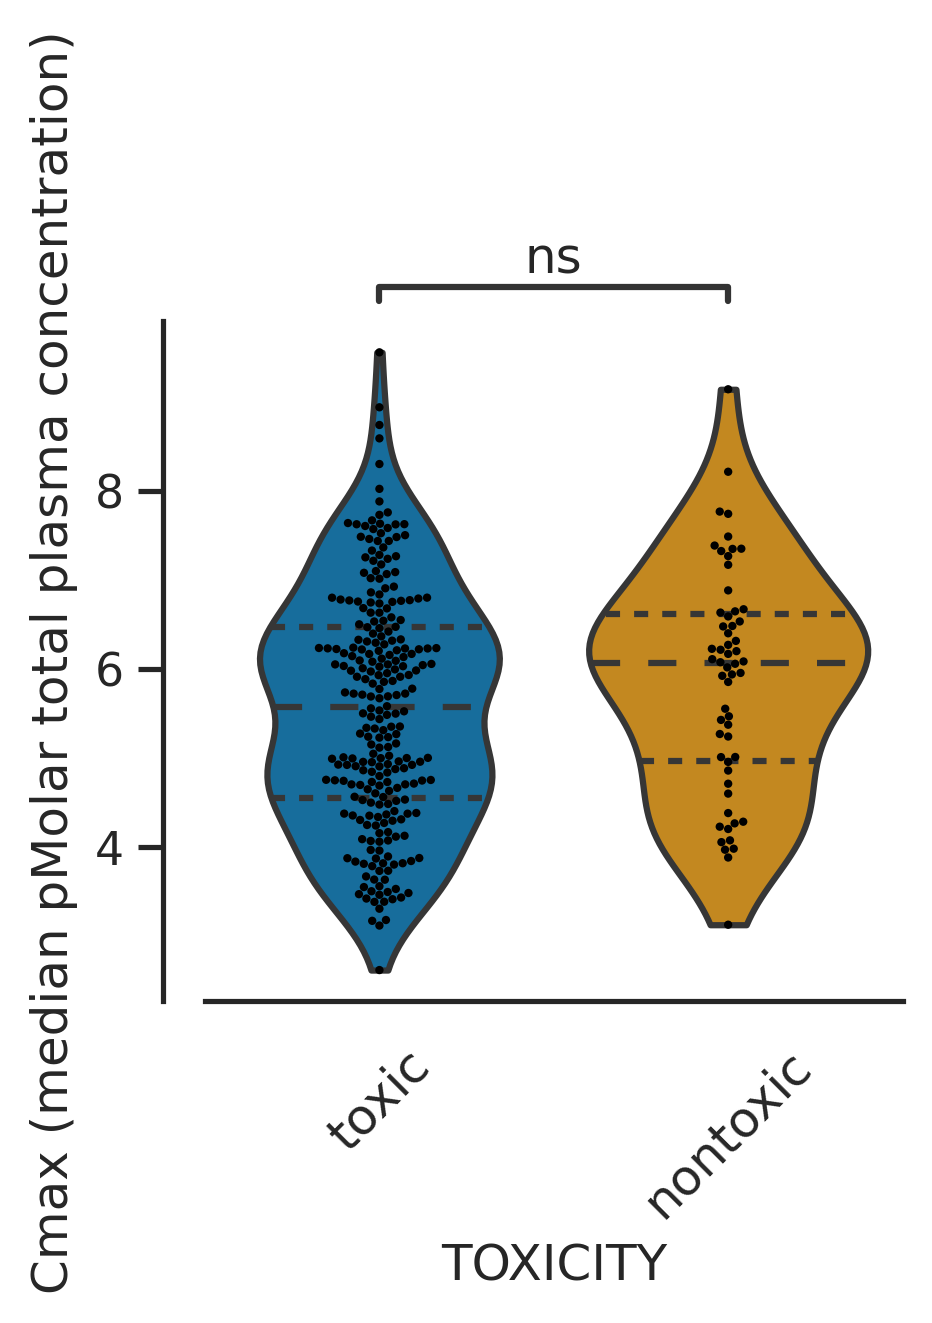

217
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.752e-02 U_stat=1.710e+03
Hi


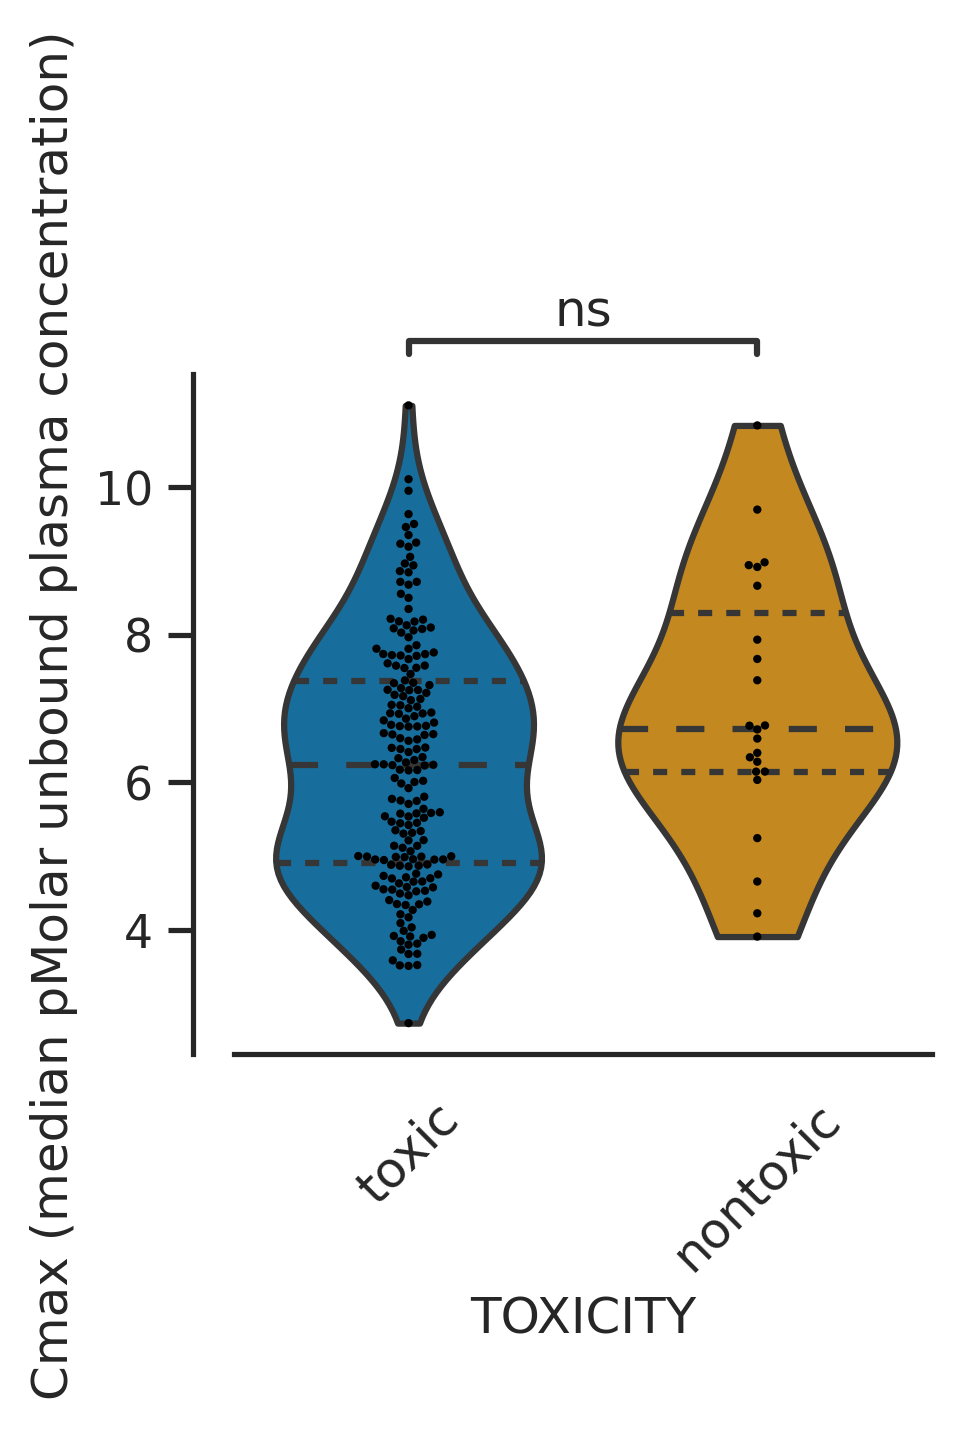

5
5
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.000e+00
Hi


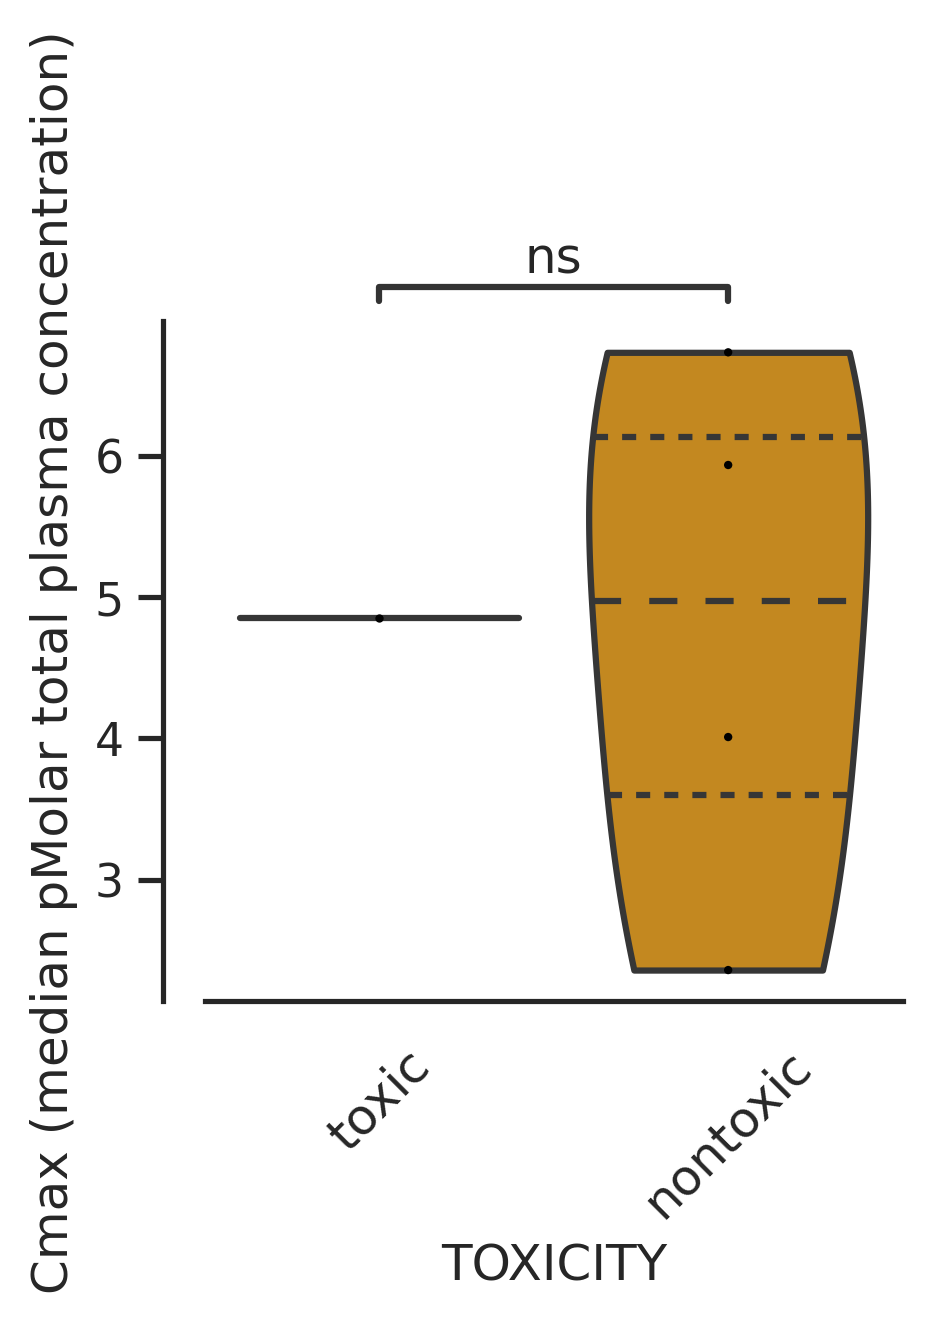

2
6
6
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.667e-01 U_stat=1.000e+00
Hi


<Figure size 900x900 with 0 Axes>

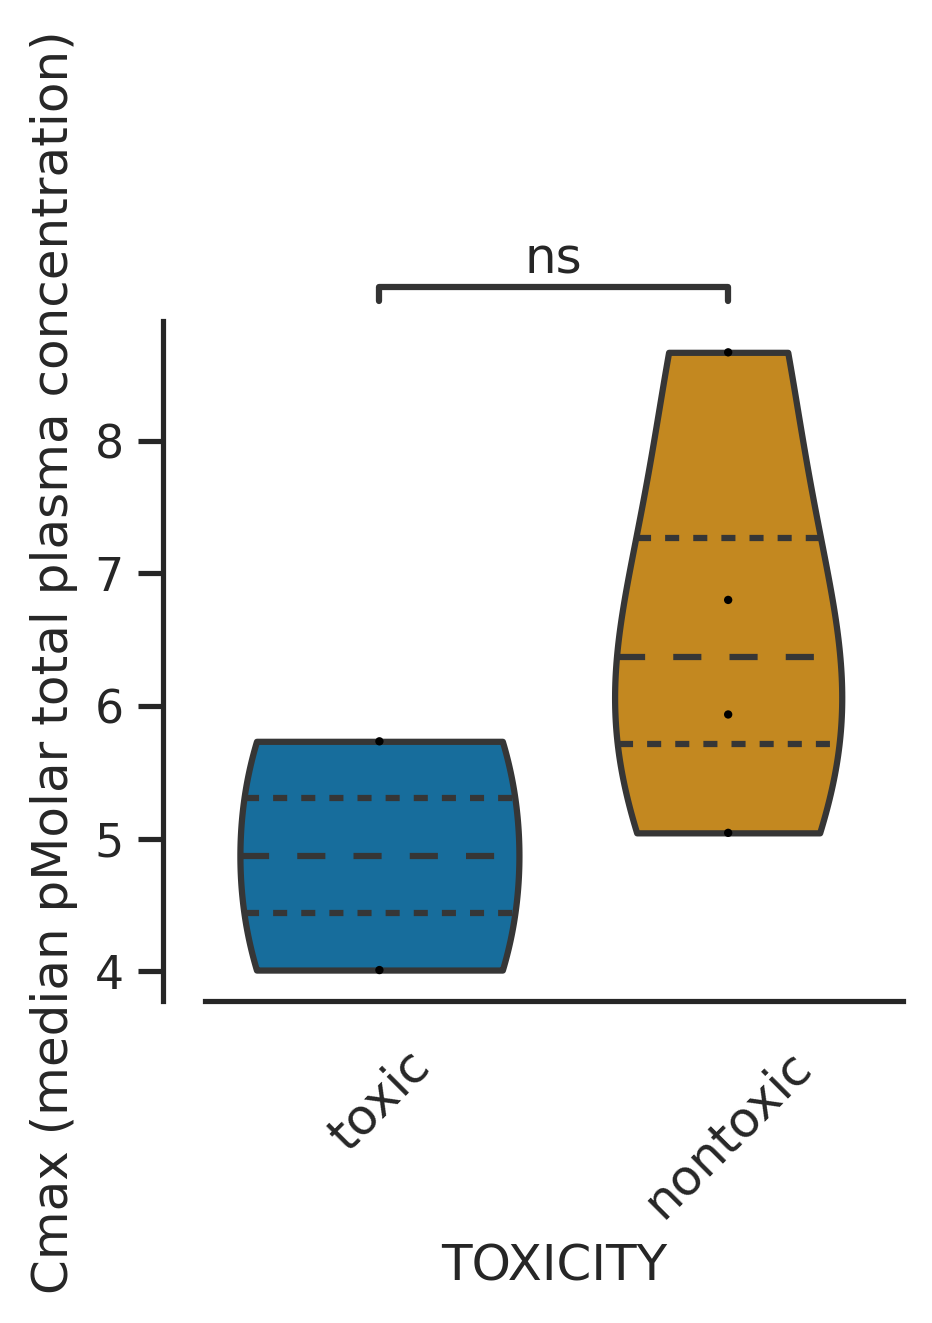

4
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.667e-01 U_stat=1.000e+00
Hi


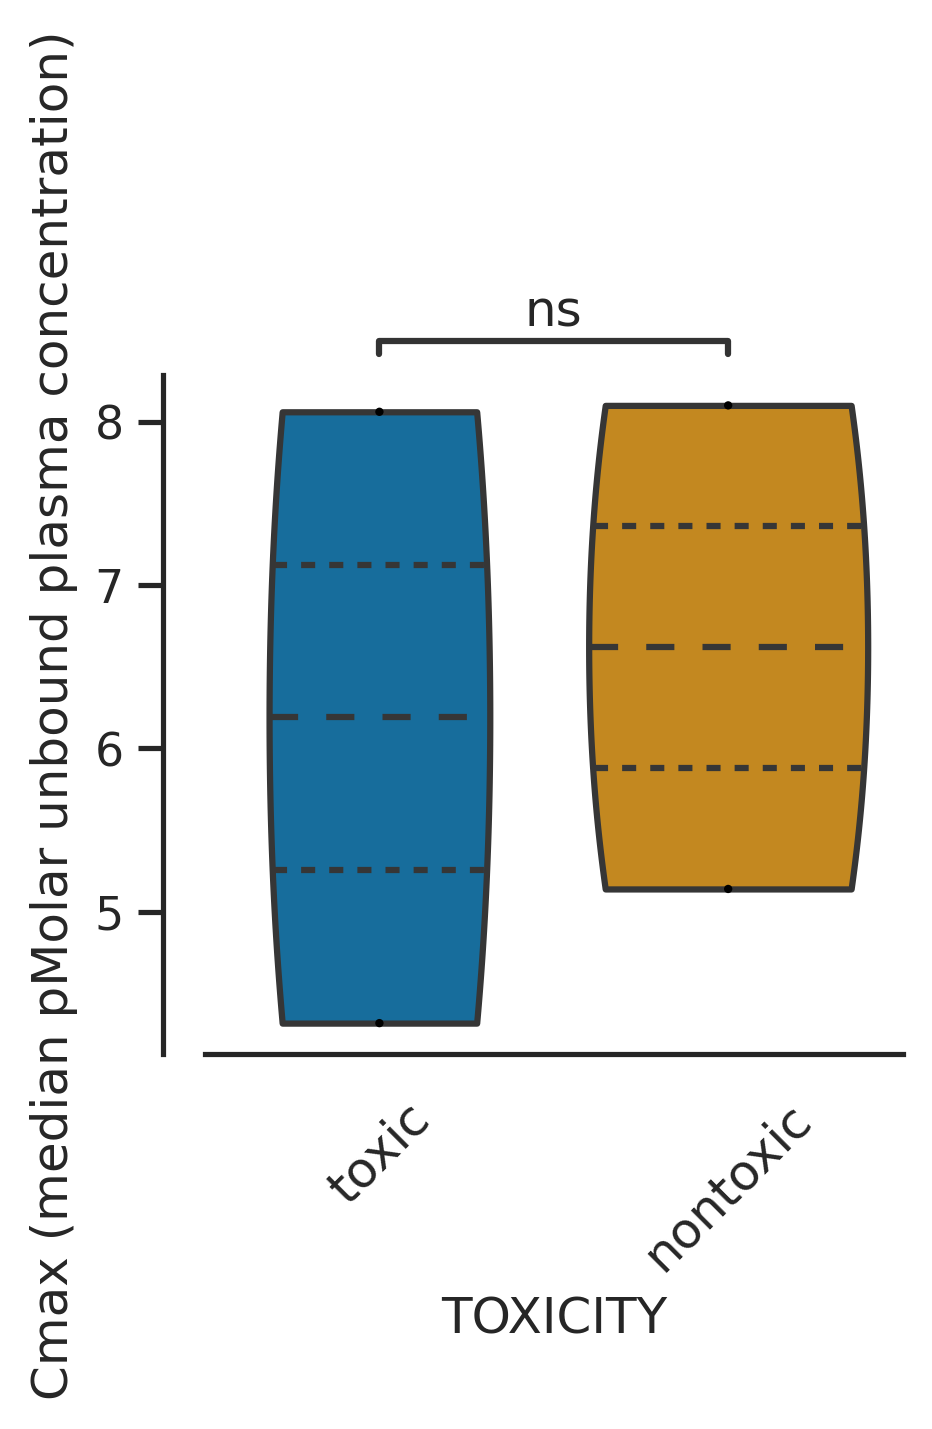

7
283
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.679e-01 U_stat=7.418e+03
Hi


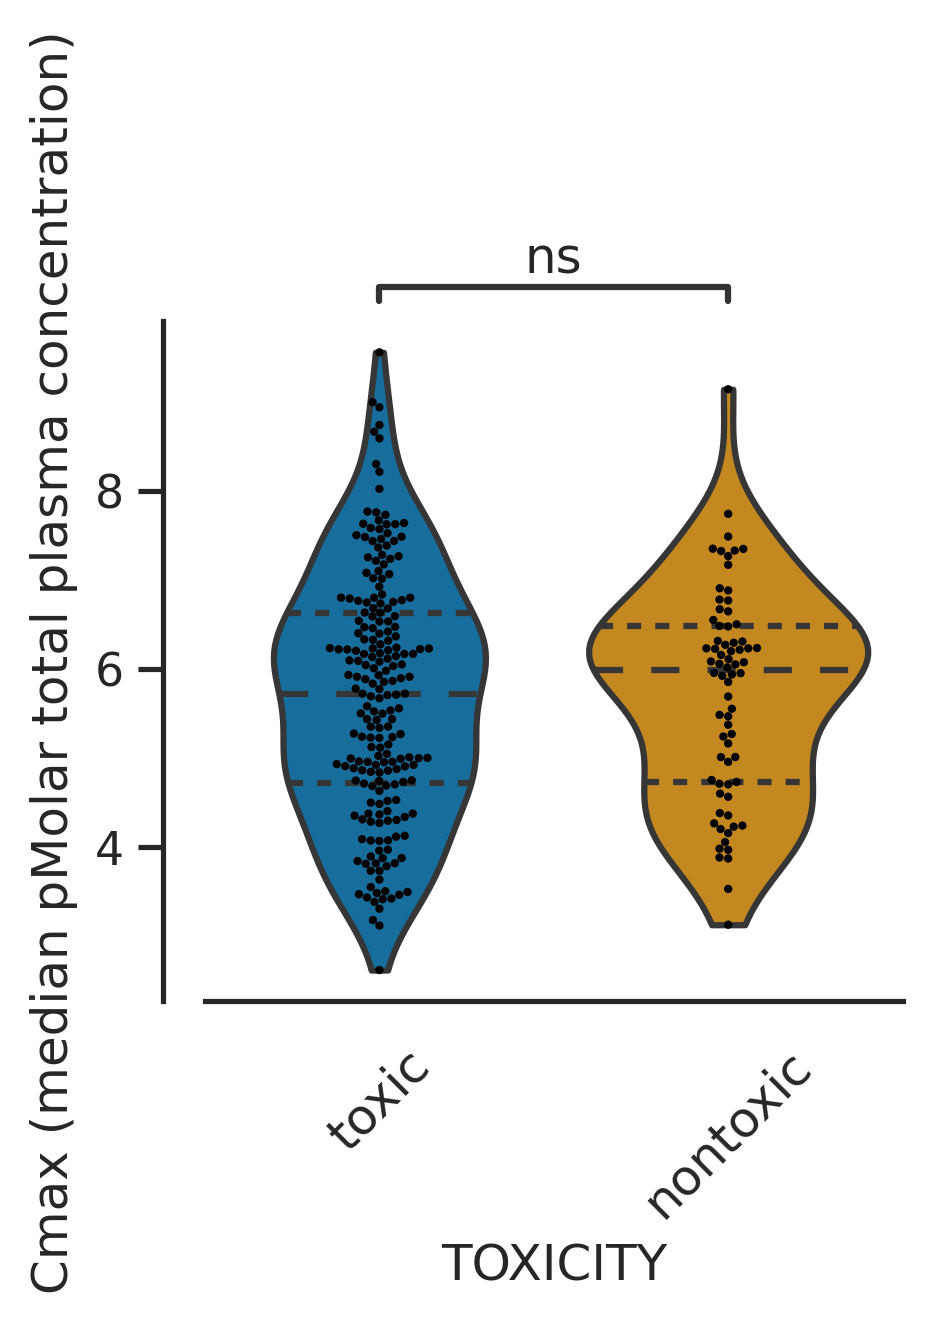

194
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.112e-01 U_stat=2.210e+03
Hi


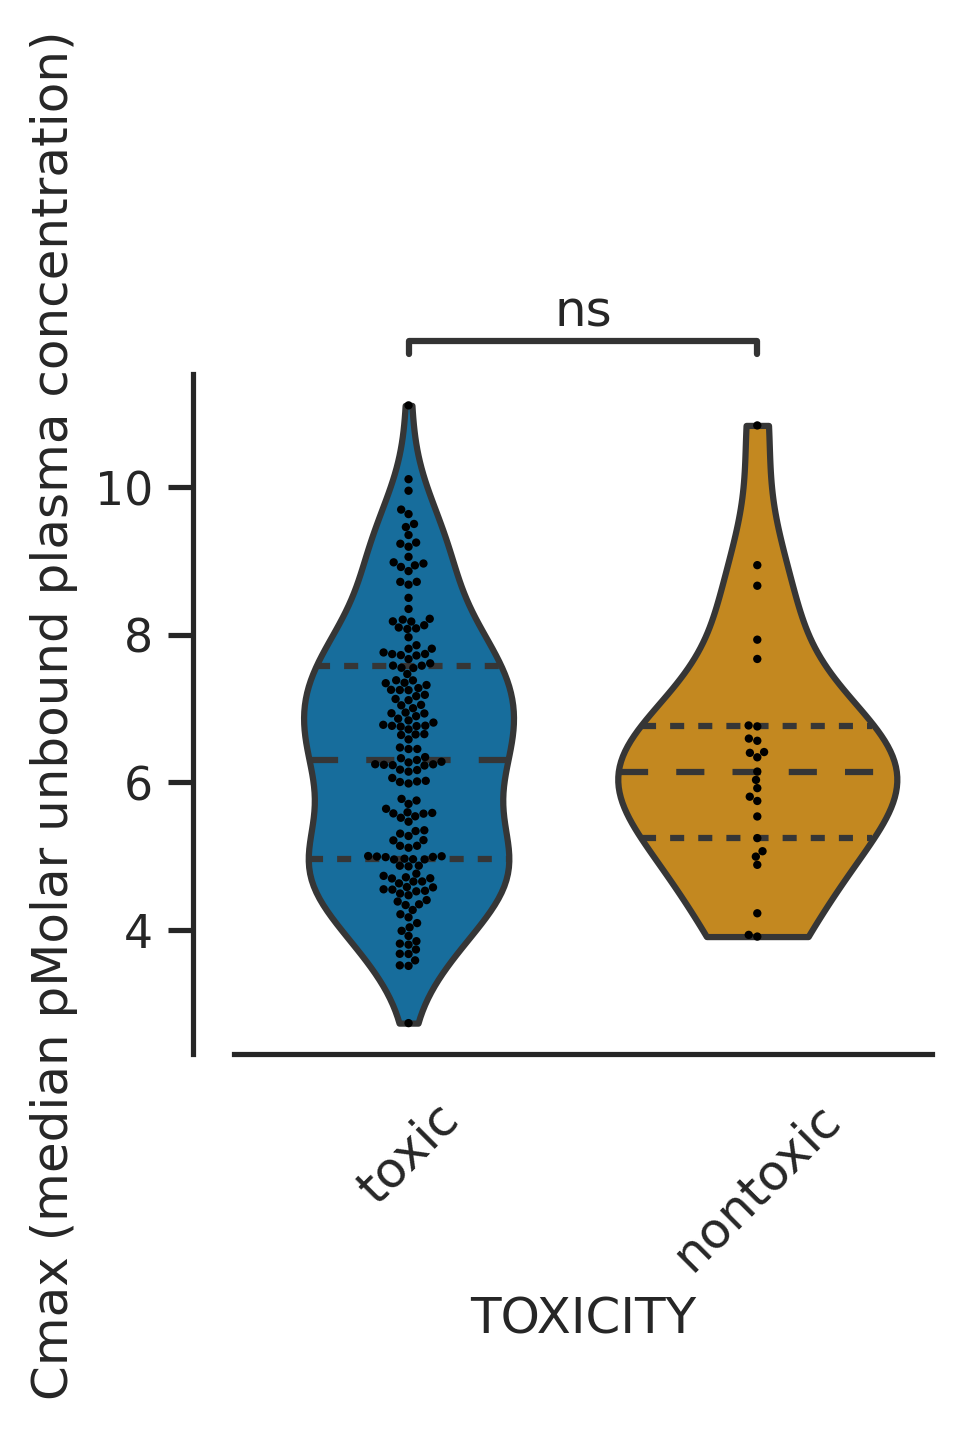

8
87
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.144e-02 U_stat=6.660e+02
Hi


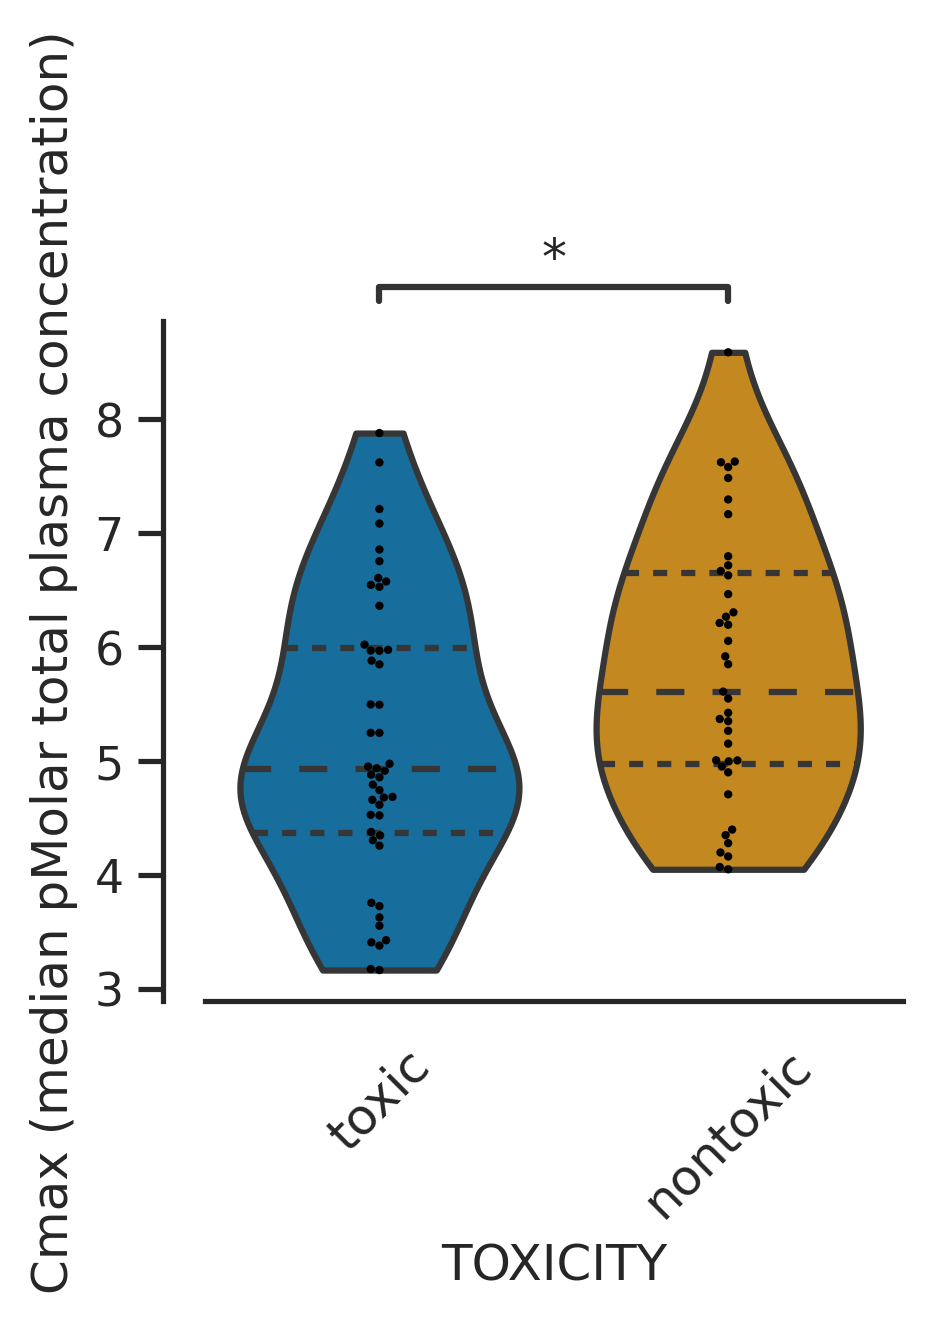

57
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.435e-01 U_stat=3.070e+02
Hi


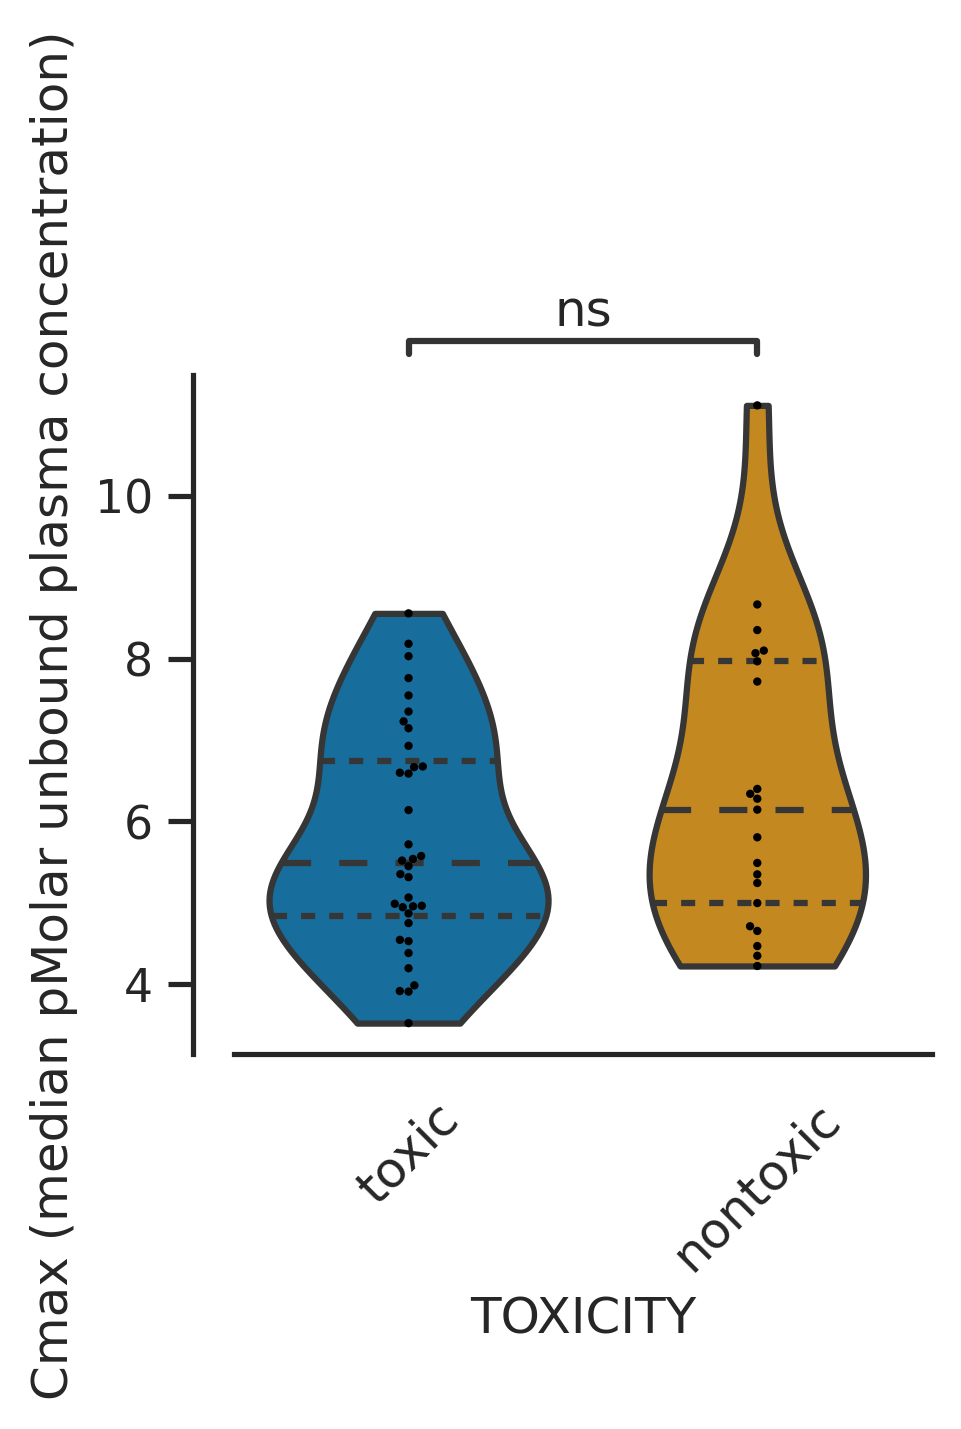

11
111
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.172e-02 U_stat=1.022e+03
Hi


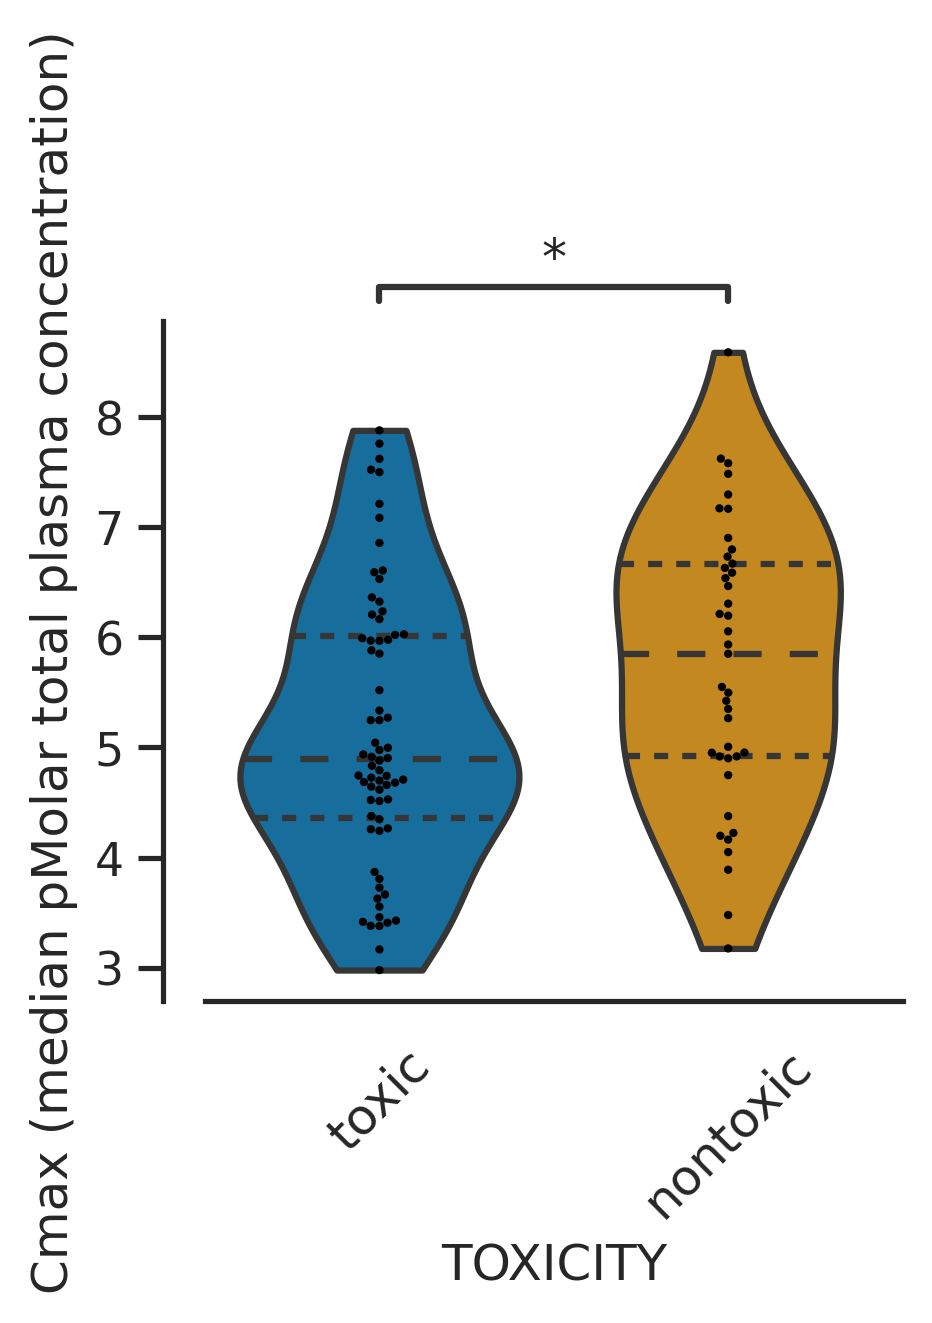

75
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.883e-01 U_stat=4.830e+02
Hi


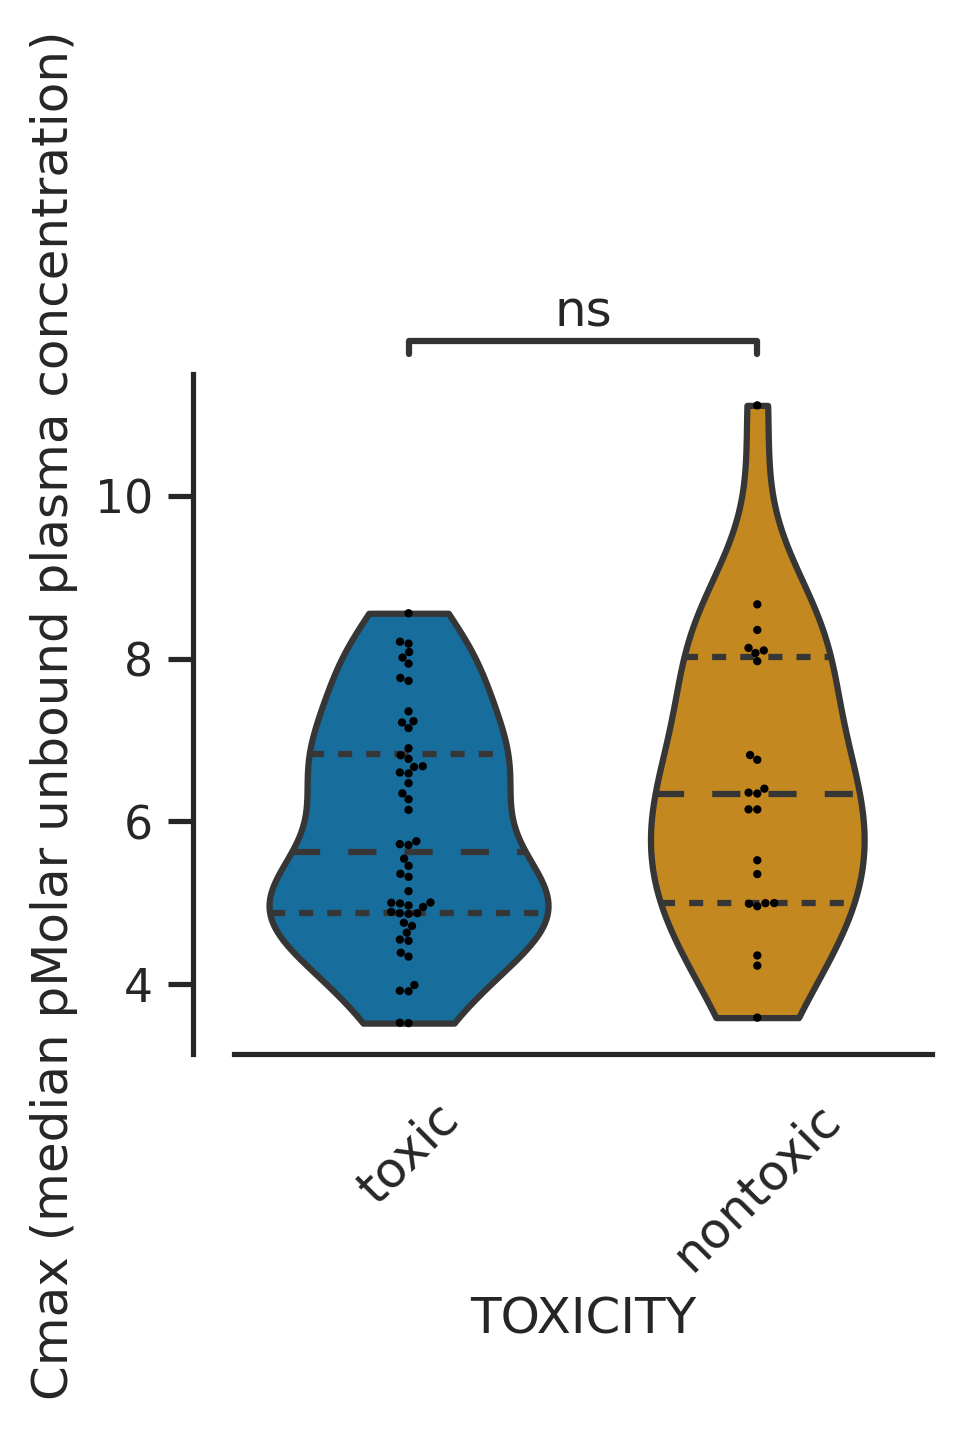

14
209
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.864e-04 U_stat=6.415e+03
Hi


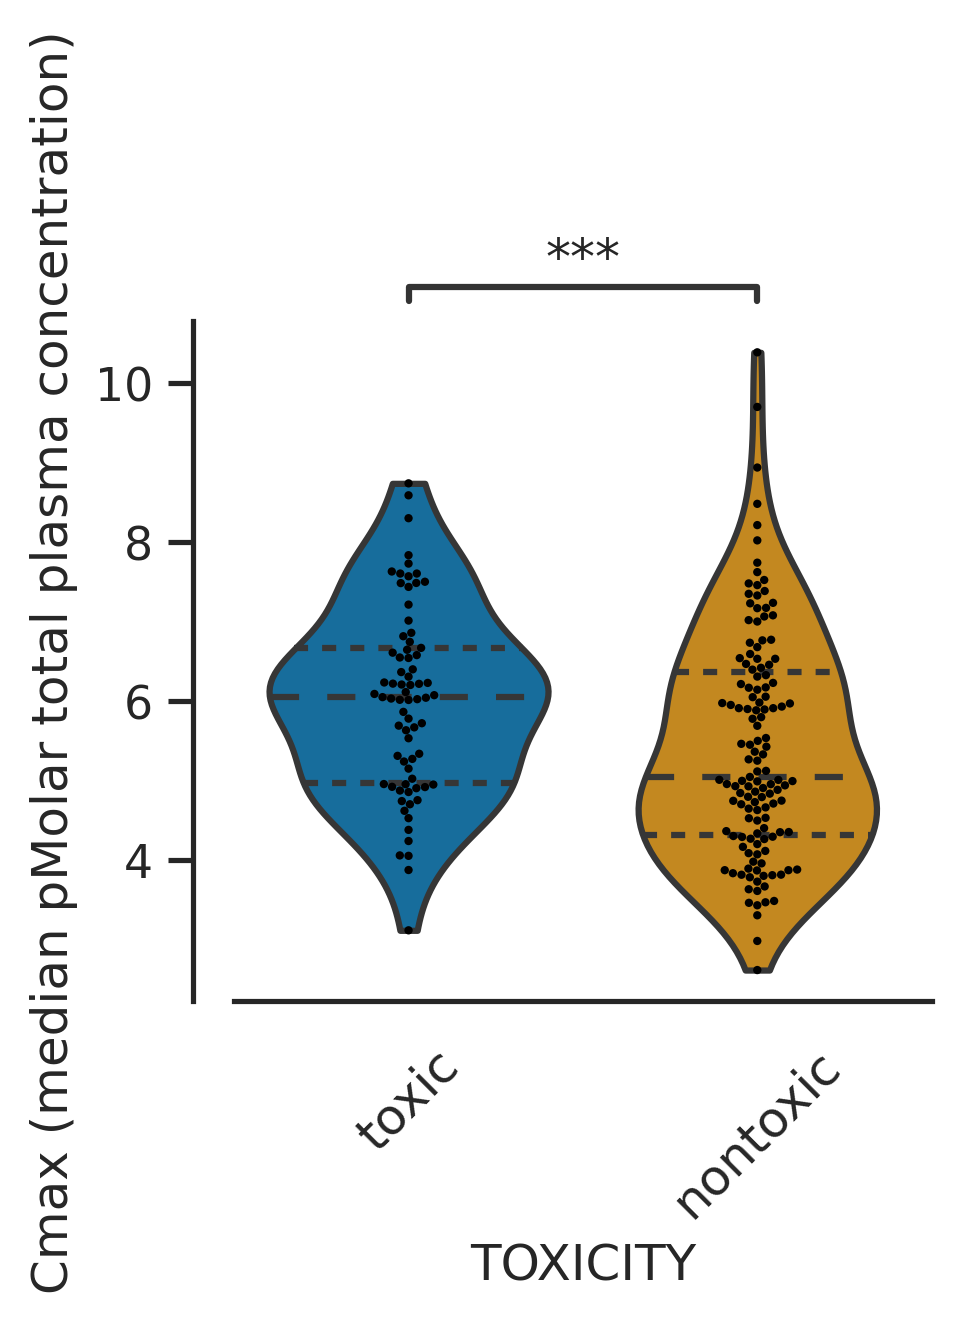

162
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.280e-07 U_stat=4.266e+03
Hi


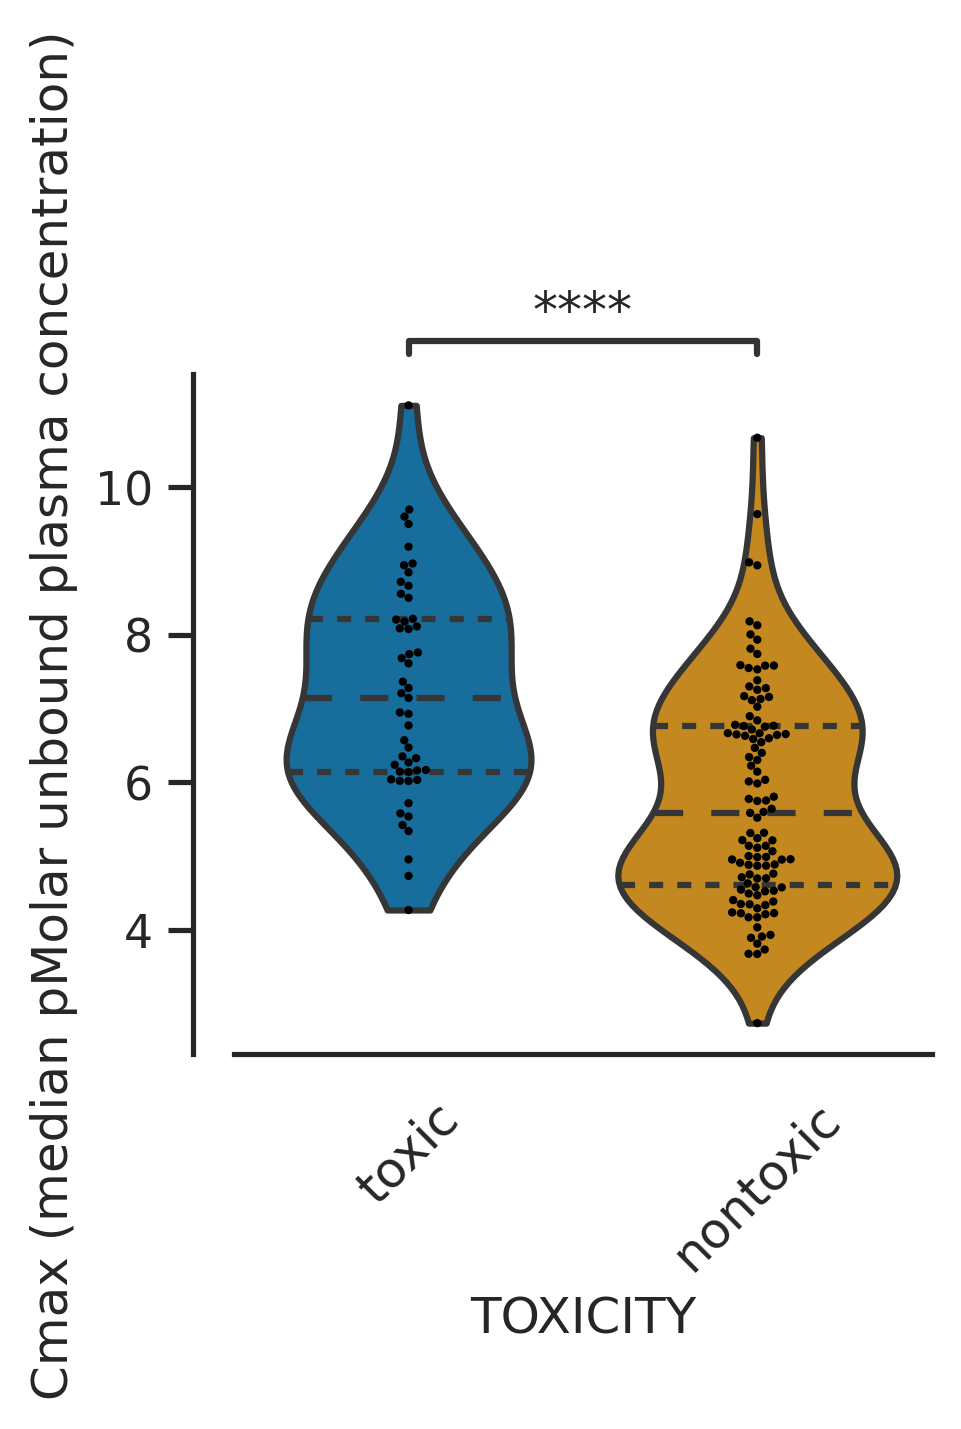

15
325
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.493e-03 U_stat=6.935e+03
Hi


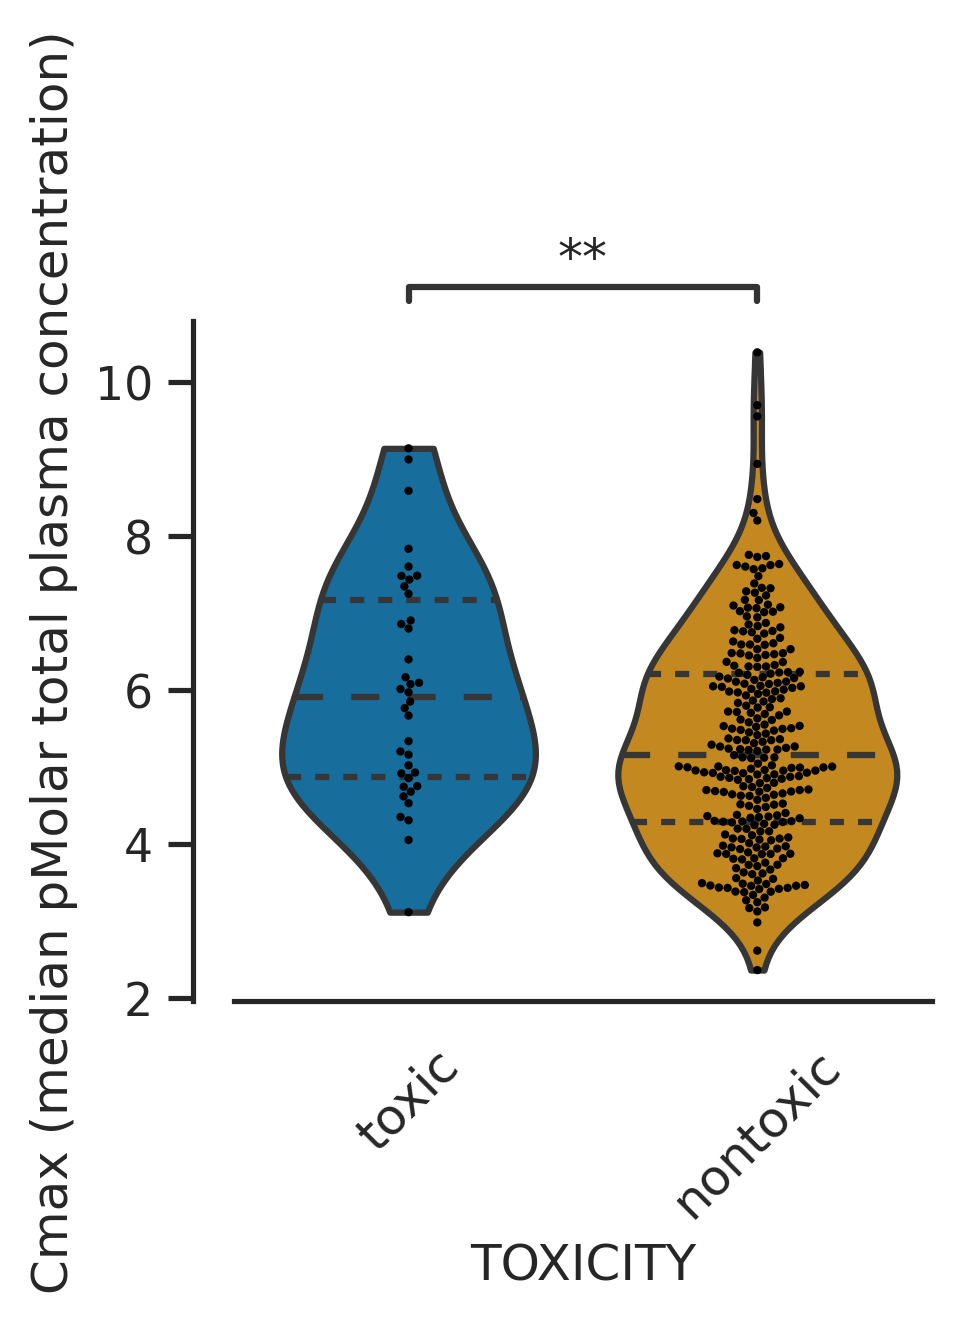

233
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.595e-07 U_stat=4.624e+03
Hi


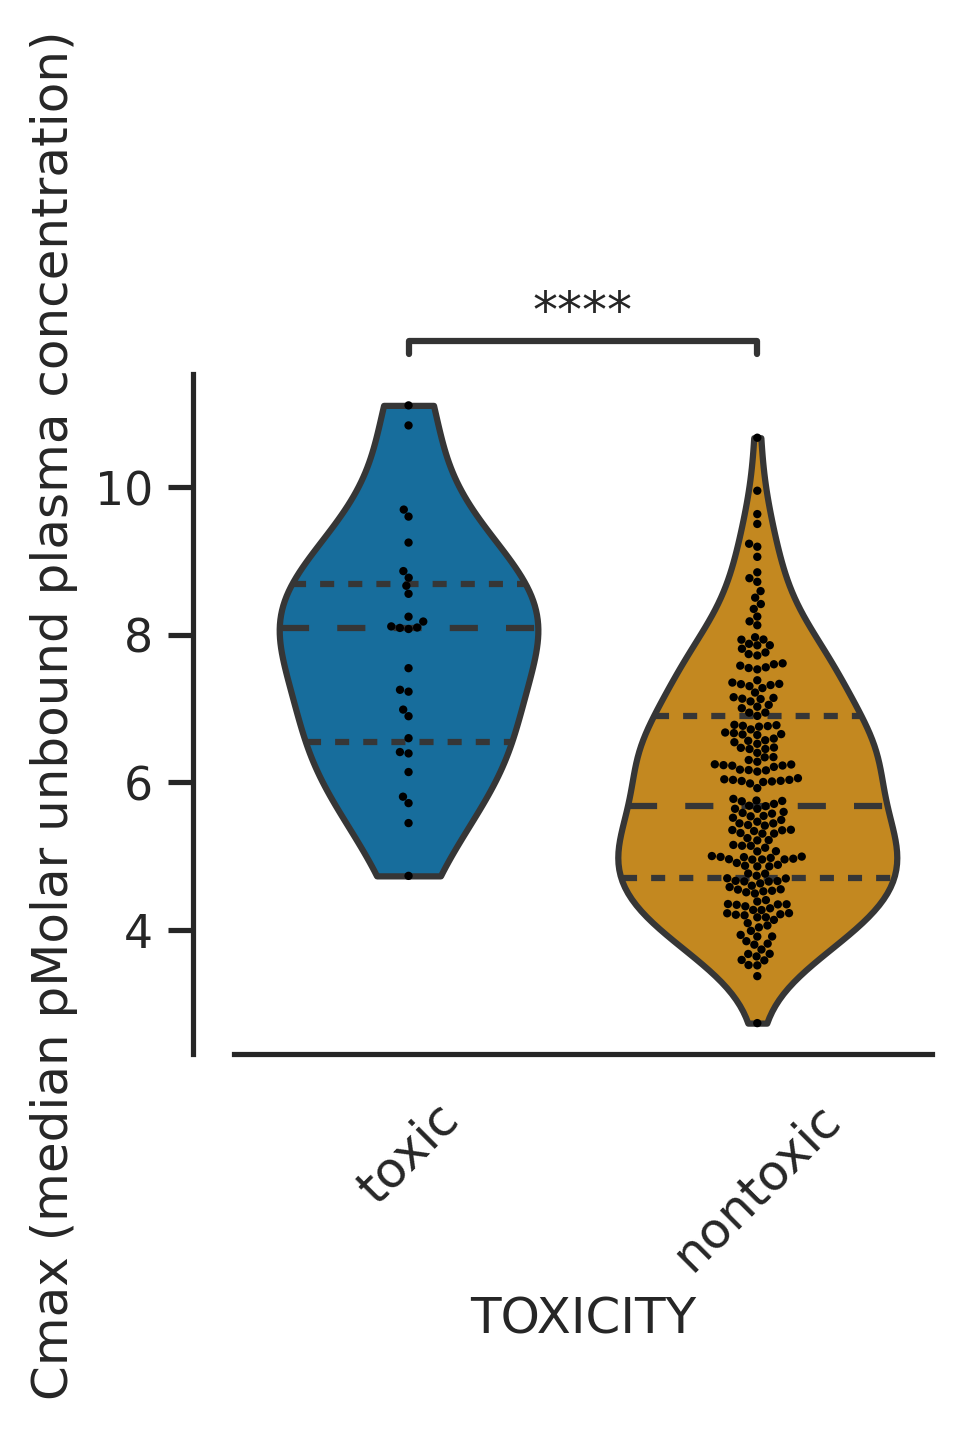

16
40
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.778e-01 U_stat=7.300e+01
Hi


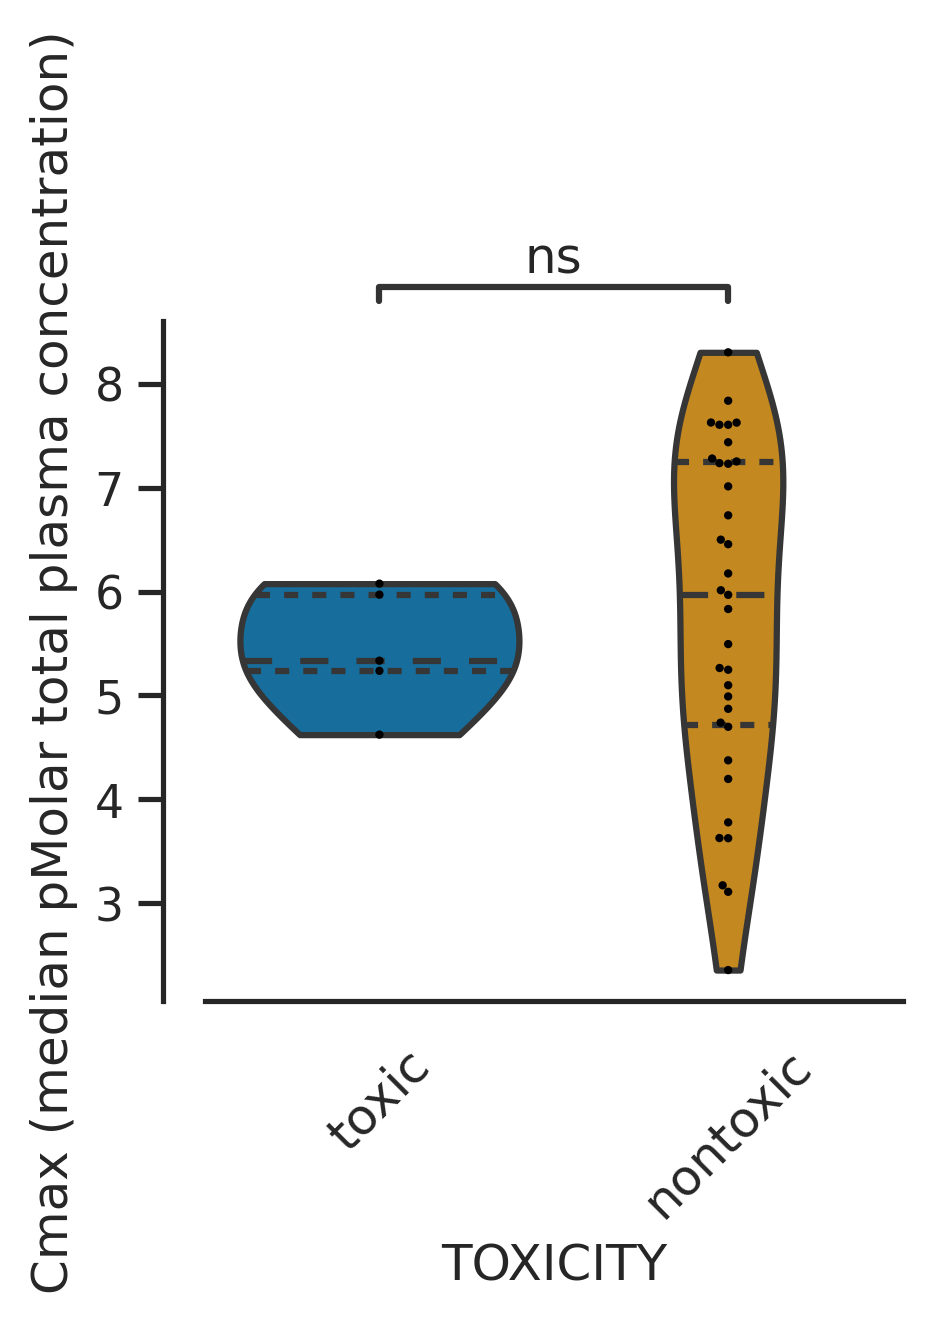

36
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.938e-01 U_stat=9.000e+01
Hi


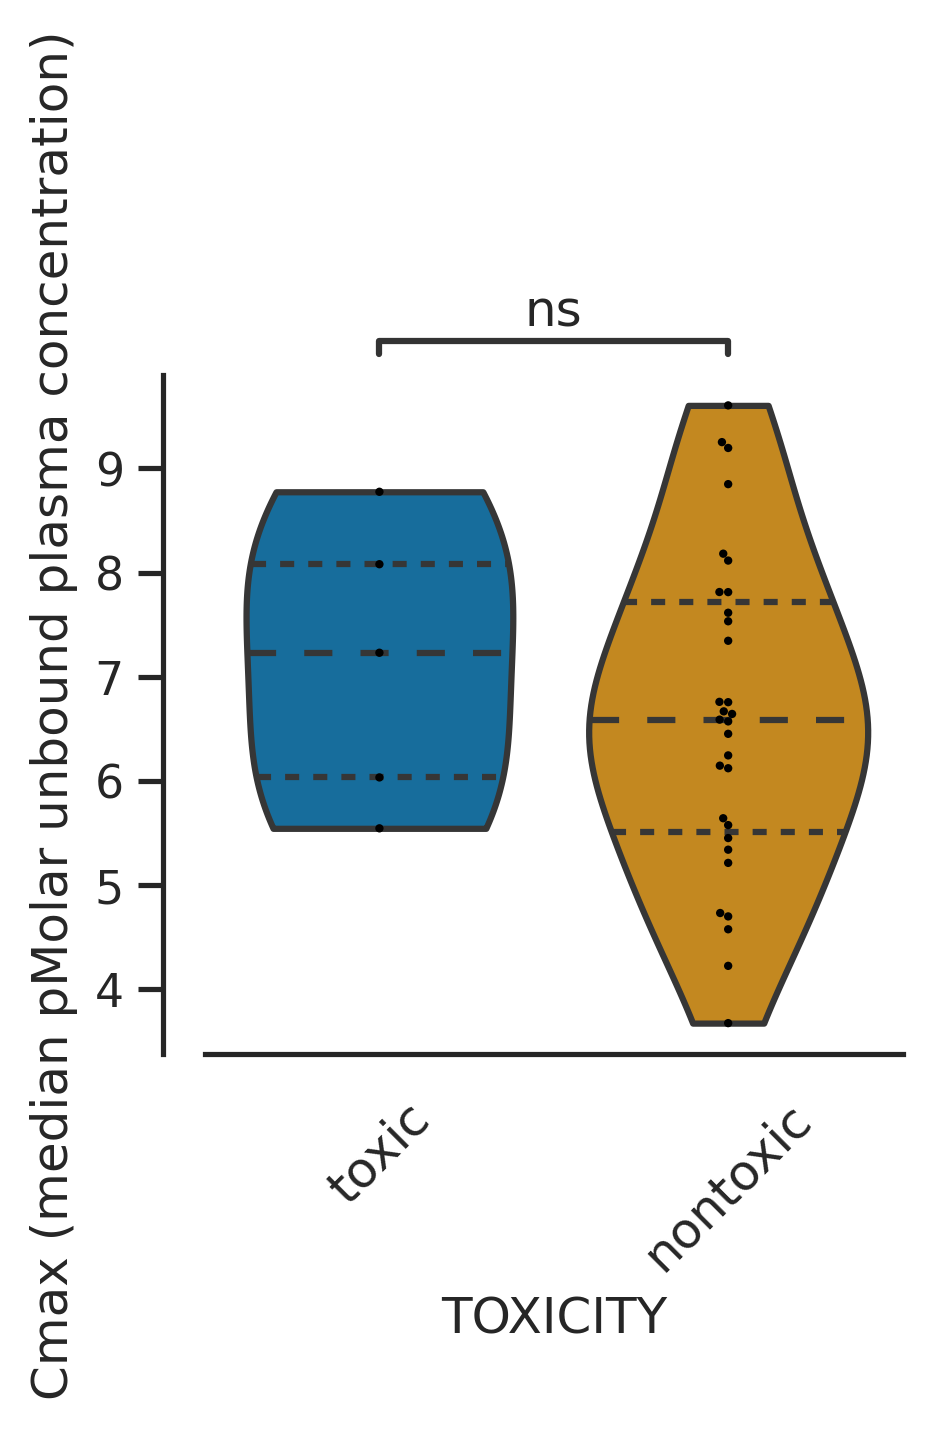

DILI
556
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.402e-06 U_stat=2.595e+04
Hi


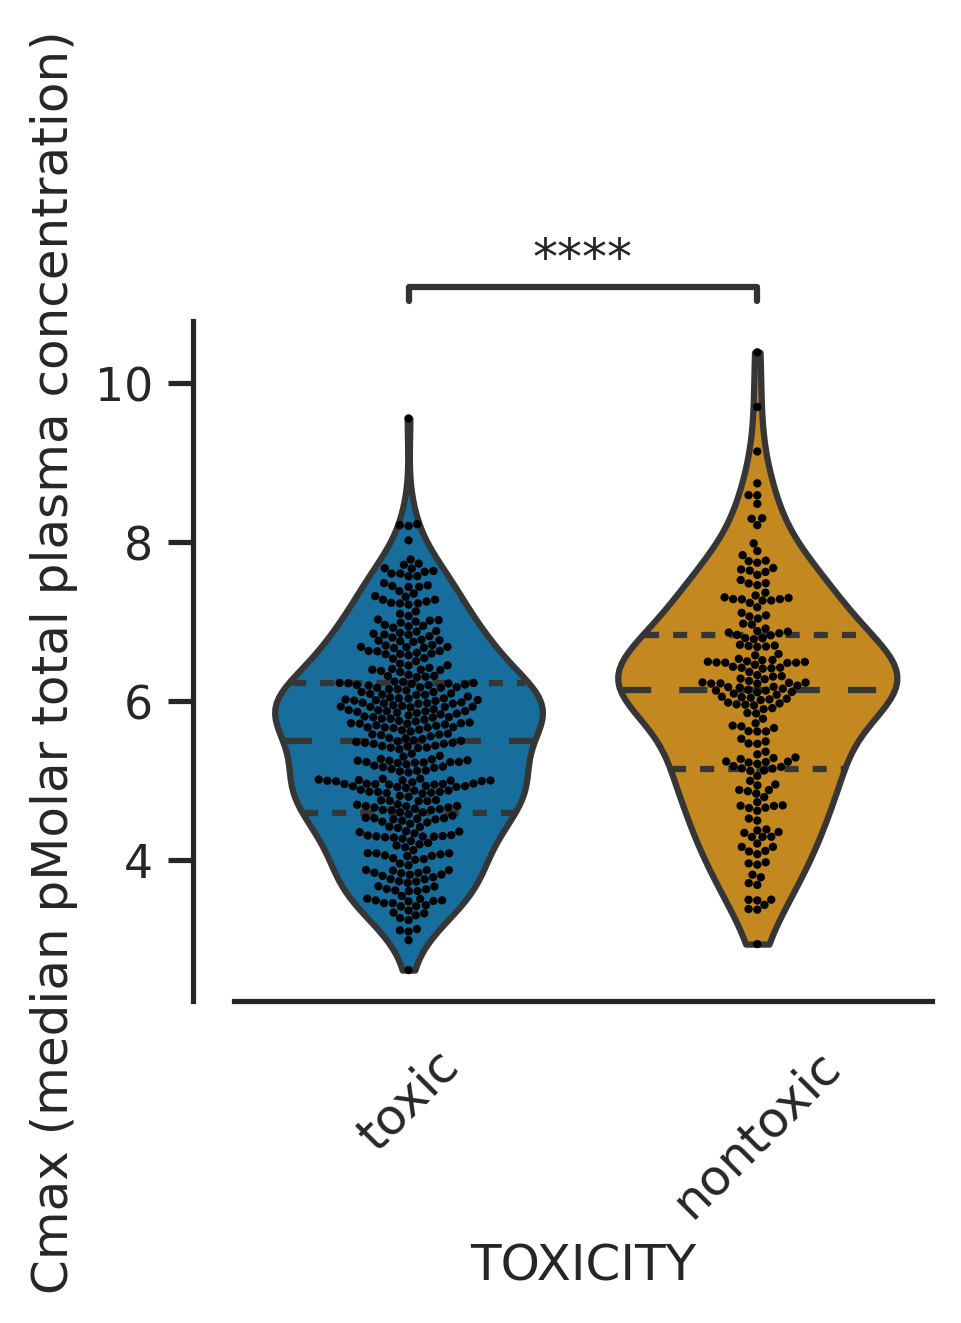

433
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.506e-02 U_stat=1.679e+04
Hi


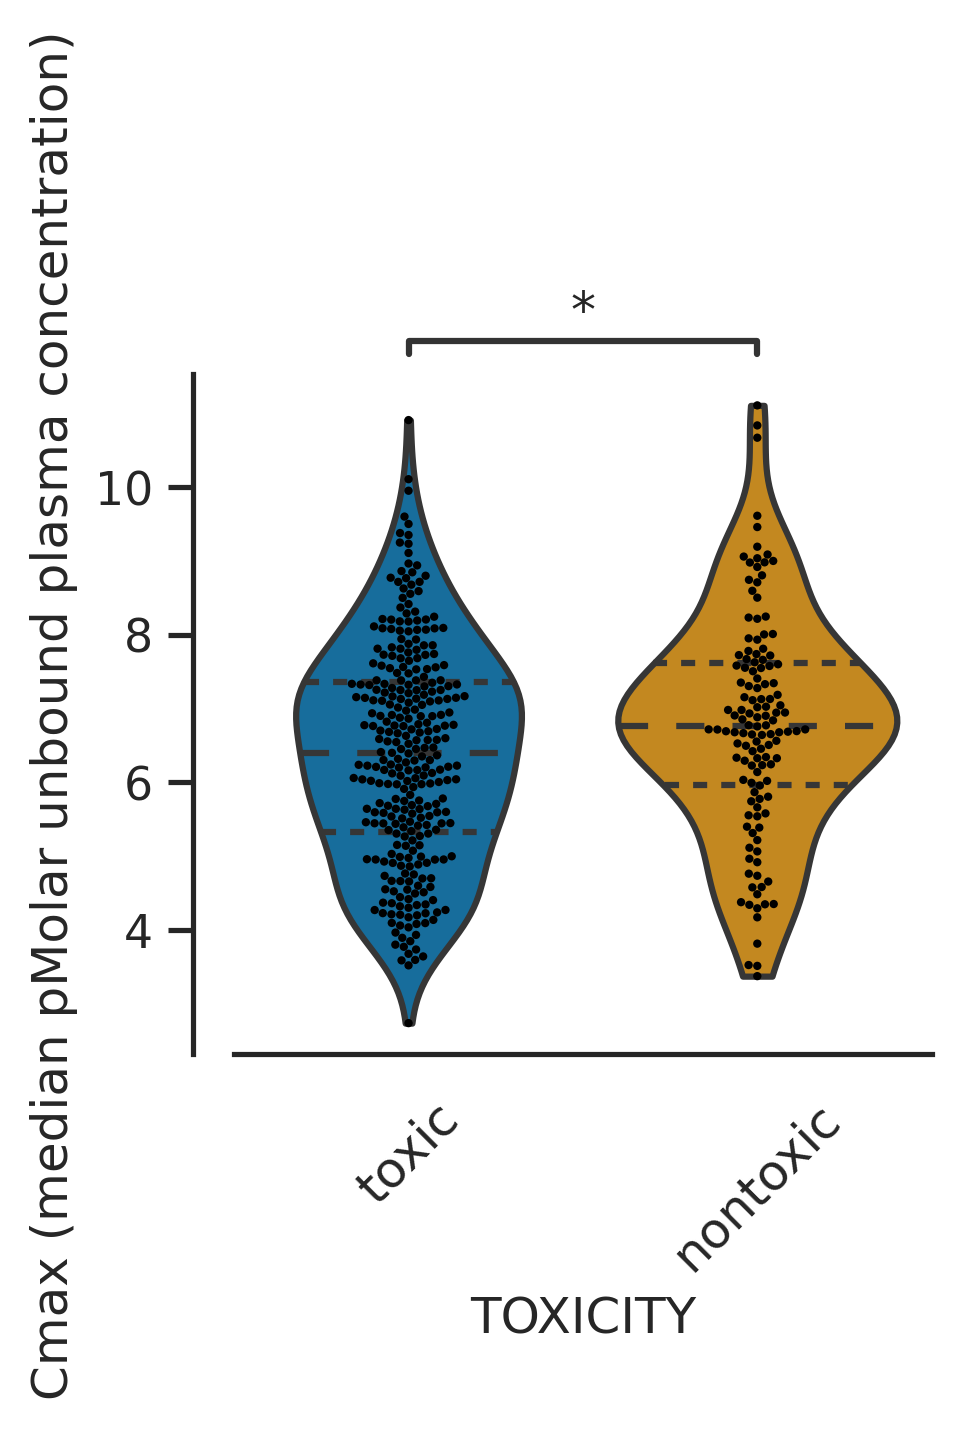

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")


for i in all_sources_list:
        
    print(i)
    df1 = train_data[train_data["Source_rank"]==i][["protonated_smiles_r","TOXICITY"]].drop_duplicates(keep=False).reset_index(drop=True)
    df2 = cmax_data
    
    merged_df = pd.merge(df1, df2, on="protonated_smiles_r").reset_index(drop=True)
    merged_df['TOXICITY'] = merged_df['TOXICITY'].replace({1: 'toxic', 0: 'nontoxic'})
   
        
    for c_label in ['median pMolar total plasma concentration', 'median pMolar unbound plasma concentration']:
        # Create a figure and axis using Seaborn
        plt.figure(figsize=(3, 3), dpi=300)
        sns.set(style="white")  # Set the style

        merged_df = merged_df.dropna(subset=[c_label]).reset_index(drop=True)
        size = len(merged_df)
        print(size)
        
        if (len(merged_df.TOXICITY.unique())<2):
            continue
        
        # Create the violin plot for Cmax
        ax = sns.violinplot(data=merged_df, x='TOXICITY', y=c_label,
                            palette=colors, inner="quart", cut=0, alpha=0.7)

        # Overlay a swarm plot on top of the violin plot
        sns.swarmplot(data=merged_df, x='TOXICITY', y=c_label,
                      color="black", size=2)

        # Set labels and title
        ax.set_ylabel(f'Cmax ({c_label})', fontsize=12)
        ax.set_xlabel('TOXICITY', fontsize=12)

        # Set x-axis ticks and labels with rotation, increased fontsize
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

        # Add statistical annotations for pairwise comparisons

        print(c_label)

        add_stat_annotation(ax, data=merged_df, x='TOXICITY', y=c_label, 
                            box_pairs=[('toxic', 'nontoxic')], test='Mann-Whitney', 
                            text_format='star', loc='outside', verbose=2)

        print("Hi")

        # Remove box line, set y-axis on the left
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_position(('outward', 10))
        ax.yaxis.set_ticks_position('left')

        # Show the plot
        plt.savefig(f'{c_label}_violinswarm_comparison_with_stats.png', bbox_inches='tight')
        plt.show()
